4603


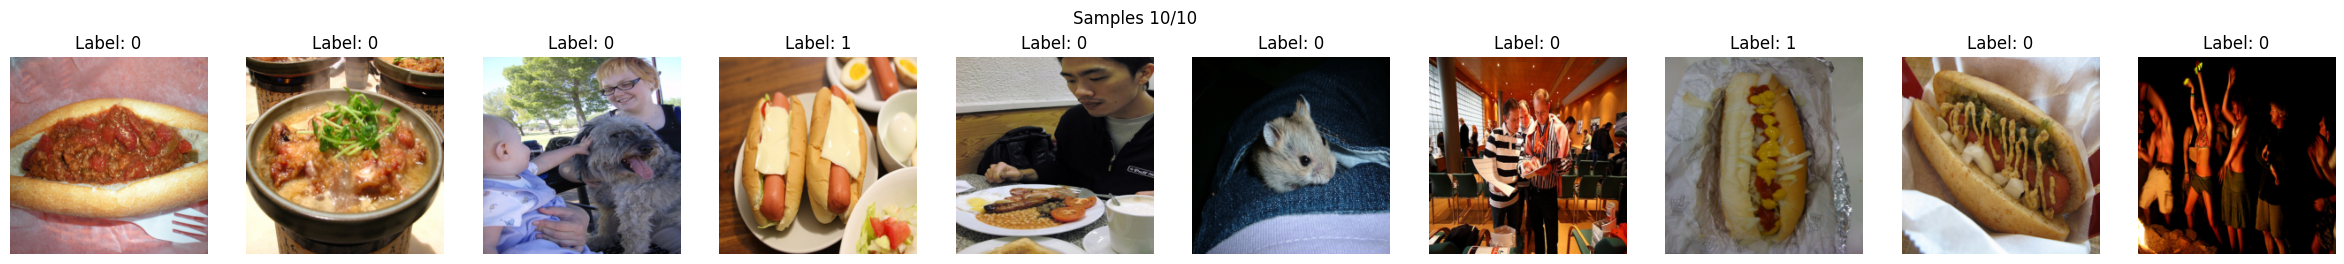

Image shape:  torch.Size([3, 224, 224])


In [1]:
import numpy as np
from dataset import HotdogOrNotDataset, visualize_samples
import torchvision
%load_ext autoreload
%autoreload 2

train_folder = 'data/train'

train_dataset = HotdogOrNotDataset(train_folder)
print(len(train_dataset))
indices = np.random.choice(np.arange(len(train_dataset)), 10, replace=False)
visualize_samples(train_dataset, indices, "Samples")
img, y, label = train_dataset[0]
print("Image shape: ", img.shape)

In [2]:
import numpy as np
import torch
from torch.utils.data import DataLoader, Subset
from torchvision import transforms


num_samples = len(train_dataset)
ind_valid = np.random.choice(num_samples, 750, replace=False)
ind_train = np.array(list(set(range(num_samples)).difference(set(ind_valid))))

train_subset = Subset(train_dataset, ind_train)
valid_subset = Subset(train_dataset, ind_valid)

batch_size = 32 
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(valid_subset, batch_size=batch_size, shuffle=False)

In [3]:
from resnet import ResNet, ResidualBlock
from train_eval import train
import torch 
import torch.nn as nn
from plot import plot_loss_acc

num_classes = 2
num_epochs = 20
batch_size = 16
learning_rate = 0.01

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = ResNet(ResidualBlock, [3, 4, 6, 3]).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.001, momentum = 0.9)  

history = train(model, train_loader, val_loader, optim, criterion, device, num_epochs)
#avg_loss, acc = evaluate(model, test_data_loader, criterion, device)

plot_loss_acc(history)
#plot_confusion_matrix(model, val_data_loader, "cpu")

#print("Avg Test Loss: ", avg_loss)
#print("Test Accuracy: ", acc)

Epoch 1/20: 100%|██████████| 121/121 [3:02:21<00:00, 90.42s/it, accuracy=0.869, loss=0.0146]    


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)